### 목표
- 타이타닉 데이터를 학습시켜서 생존/사망 예측해보자

### 1. 문제 정의
- kaggle에서 제공하는 titanic 데이터를 사용해 승객의 생존 여부를 예측
- 지도 학습
- Survived 컬럼의 데이터값 수치형이지만 0,1로 생존여부만 구분하기 때문에 우선순위는 없음

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 도구

### 2. 데이터 수집
- 타이타닉 train 데이터와 test 데이터를 변수에 저장

In [286]:
train = pd.read_csv('data/train.csv', index_col ='PassengerId')
test = pd.read_csv('data/test.csv', index_col ='PassengerId')

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [287]:
# 크기 확인
print('훈련 데이터 셋 크기 :', train.shape)
print('테스트 데이터 셋 크기 :', test.shape)

훈련 데이터 셋 크기 : (891, 11)
테스트 데이터 셋 크기 : (418, 10)


### 3. 데이터 전처리 및 데이터 탐색

In [288]:
train.info()
# 결측치가 있는 컬럼 : Age, Cavin, Embarked

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [289]:
test.info()
# 결측치가 있는 컬럼 : Age, Fare, Cabin

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [290]:
# 컬럼 정보 정리
train.columns
# Survived : 생존/사망 결과 값이 담긴 컬럼(0: 사망, 1: 생존)
# Pclass : 객실의 등급(1:상위층, 2:중상위측, 3:하위층)
# SibSp : 형제자매/배우자 수 (같이 탑승한)
# Parch : 부모/자식 수 (같이 탑승한)
# Ticket : 티켓의 번호
# Fare : 지불 요금
# Cabin : 객실 번호
# Embarked : 승선항 (S, C, Q)


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 결측치 채우기
- train : Age, Cabin, Embarked
- test : Age, Fare, Cabin

In [291]:
# 결측치 채우는 방법
# 1. 결측치가 있는 행 전체 삭제하는 방법
# > 삭제하려는 데이터가 너무 많거나 모델링에 치명적이지 않은 데이터
# > 데이터가 많을수록 과대적합을 피할 수 있는데, 삭제하면 학습하는 데이터가 줄어듬

# 2. 결측치를 다른 값으로 대체하는 방법
# > 평균값, 최빈값, 중앙값, 다른 변수와 관계를 보고 입력, ...

- train Embarked(승선항) 컬럼 결측치 채우기

In [292]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [293]:
train['Embarked'].isnull().value_counts()

Embarked
False    889
True       2
Name: count, dtype: int64

In [294]:
train['Embarked'].isnull().sum()

np.int64(2)

In [295]:
# train의 승선항이 결측치가 있는 데이터 출력
# train['Embarked'] == 결측치
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [296]:
# 사람이 가장 많이 탑승한 장소의 승선항 값으로 채워주기 - 최빈값
# fillna('값')
# 비어있는 데이터가 있다면 '값'으로 채워주는 함수
train['Embarked'] = train['Embarked'].fillna('S')

In [297]:
train['Embarked'].isnull().sum()

np.int64(0)

In [298]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- test 데이터의 Fare컬럼의 결측치 채우

In [299]:
# 불리언 인덱싱
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [300]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [301]:
# Fare컬럼과 연관성이 있는 컬럼이 있지는 않을까?
# 상관관계
test.corr(numeric_only=True) # 숫자로 된 컬럼만 포함
# 상관 계수 : -1 ~ 1 범위로 표현
# -1, 1에 가까울수록 해당 컬럼과 상관이 높다
# 0에 가까울수록 해당 컬럼과 선형관계가 없음을 의미

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


In [302]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [303]:
train.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [304]:
test.corr(numeric_only=True)['Fare'].abs().sort_values(ascending=False)

# train, test 'Fare'컬럼은 Pclass와 연관성이 상대적으로 높다.

Fare      1.000000
Pclass    0.577147
Age       0.337932
Parch     0.230046
SibSp     0.171539
Name: Fare, dtype: float64

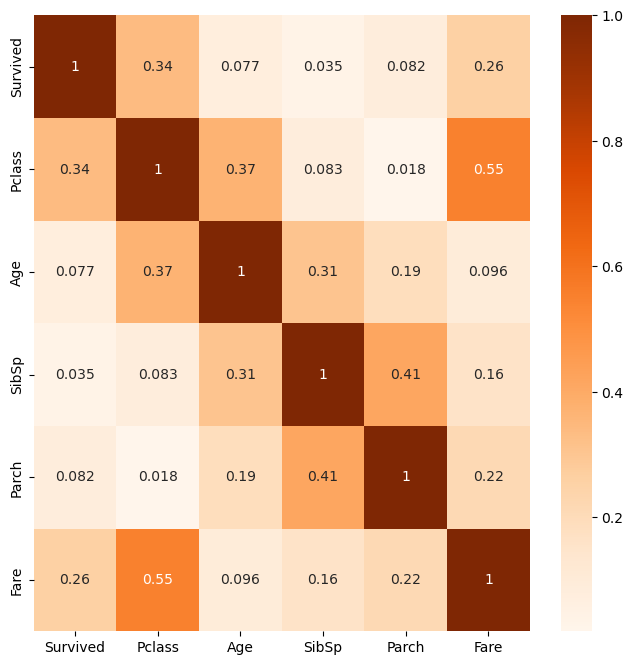

In [305]:
# 히트맵
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(numeric_only=True).abs(), annot = True, cmap='Oranges')
plt.show()

In [306]:
# train Pclass
train['Pclass'].unique()

array([3, 1, 2])

In [307]:
# 객실 등급을 기준으로 그룹화 groupby(), 요금 집계함수는 중앙값
train[['Pclass', 'Fare']].groupby('Pclass').median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [308]:
# Pclass, sex을 기준으로 그룹핑하여 Fare 중앙값을 확인
train[['Pclass','Sex','Fare']].groupby(['Pclass','Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [309]:
# 결측치가 있는 행 출력 : Fare
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [310]:
# fillna를 사용해서 결측치를 채워보자
# Pclass는 3등석, 남자 - 7.92500
test['Fare'].fillna(7.925, inplace = True)


In [311]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [312]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

- train, test Age 채우기
  - 위에서 사용했던 Pclass, Sex컬럼을 그룹핑하여 Age의 집계를 확인하고 채우기

In [313]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [314]:
# Age는 Pclass와 상관관계가 상대적으로 높았음
# Pclass, Sex을 그룹핑해서 Age의 평균 출력
gb1= train[['Pclass', 'Sex', 'Age']].groupby(['Pclass','Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [315]:
# gb1 - index 2개 
# 2등급 객실, 남성

gb1.loc[ (2,'male') , : ]

Age    30.740707
Name: (2, male), dtype: float64

In [316]:
# 3등석 여성의 평균 나이
gb1.loc[ (3,'female') ]

Age    21.75
Name: (3, female), dtype: float64

In [317]:
type(gb1.loc[ (3,'female') ])

pandas.core.series.Series

In [318]:
type(gb1.loc[ (3,'female') ].iloc[0])

numpy.float64

In [319]:
gb1.loc[ (3,'female') ].iloc[0]

np.float64(21.75)

In [320]:
# train Age 결측치 행
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [321]:
# 규칙에 맞게 Pclass와 Sex을 보면서 Age 채워넣는 함수 정의

def fill_age(row):
    # row : 받아오는 행에 데이터에 대한 매개변수
    # row의 Age가 결측치라면~ gb1에서 매칭되는 값을 찾아서 인덱싱 해오독
    # 결측치가 아니라면~ 원래 작성된 나이값을 사용

    # 만약에 나이가 결측라면, gb1의 값을 인덱싱
    if np.isnan(row['Age']): # 받아온 행의 'Age'가 결측치라면~
        return gb1.loc[ (row['Pclass'],row['Sex']) ].iloc[0]
        # 해당 행에서 Pclass와 Sex값을 가져와서 인덱싱

    # 결측치가 아니라면~
    else:
        return row['Age']

In [322]:
train['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [323]:
train['Age'] = train.apply(fill_age, axis=1).astype(np.int64)

# axis = 0 (행방향, 열 단위 처리)
# axis = 1 (열방향, 행 단위 처리)

In [324]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [325]:
test['Age'] = test.apply(fill_age, axis=1).astype(np.int64)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### 정리
- apply, fill_age
- 데이터를 행단위로 매개변수에 전달
- 결과값으로 Age를 채울 수 있는 대표값을 하나 return
- 정수형으로 변환을 해서 'Age'컬럼에 넣어줌

- train, test Cabin 채우기
  - Cabin 컬럼 데이터 확인, 의미있는 데이터만 활용
  - 임의의 값으로 결측치를 채워볼 예정

In [326]:
train['Cabin'].unique()

# 특성의 범주가 너무 많아 학습시 의미가 없음

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [327]:
# 우선 임의의 값으로 train, test Cavin 결측치를 채워보자
# 'M'

train['Cabin'] = train['Cabin'].fillna('M')
test['Cabin'] = test['Cabin'].fillna('M')

In [328]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [329]:
train['Cabin'].unique()

array(['M', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [330]:
# 첫글자 알파벳 1개만 추출

train['Deck'] = train['Cabin'].str[0]
# .str[] : 데이터 내부 문자열에 접근하는 함수

test['Deck'] = test['Cabin'].str[0]

In [331]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


In [332]:
train.drop('Cabin', axis =1, inplace = True)
test.drop('Cabin', axis =1, inplace = True)

In [333]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


- Deck 시각화

<Axes: xlabel='Deck', ylabel='count'>

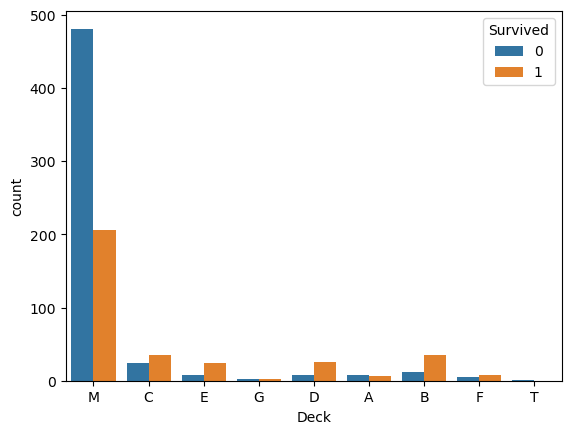

In [334]:
sns.countplot(data= train, x='Deck', hue='Survived')

# hue : 분할 기준(나타내고자 하는 것)

- Pclass에 따른 생존/사망 시각화(층이 객실 등급이랑 연관있지는 않을까)

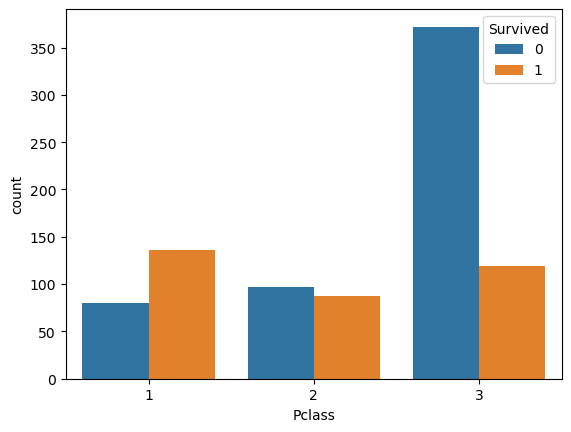

In [335]:
sns.countplot(train, x = 'Pclass', hue='Survived')
plt.show()

In [336]:
# 3등석에 탑승한 사람들이 비교적 사망자수가 많음

- Deck과 Pclass 시각화 연결

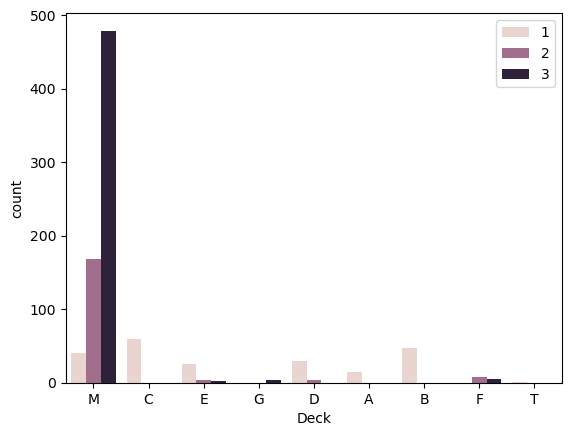

In [337]:
sns.countplot(data=train, x = 'Deck', hue = 'Pclass')
plt.legend()
plt.show()

In [338]:
# 임의의 층(결측치) M층에는 3등석인 사람들이 많음
# 그래서 Pclass가 3등급이여서 사망자가 많았음을 확인
# M이라는 데이터는 더이상 신경쓰지 않는다. Pclass데이터를 통해 알 수 있음

- Sex별, Embarked별(범주형데이터)에 따른 생존/사망 시각화

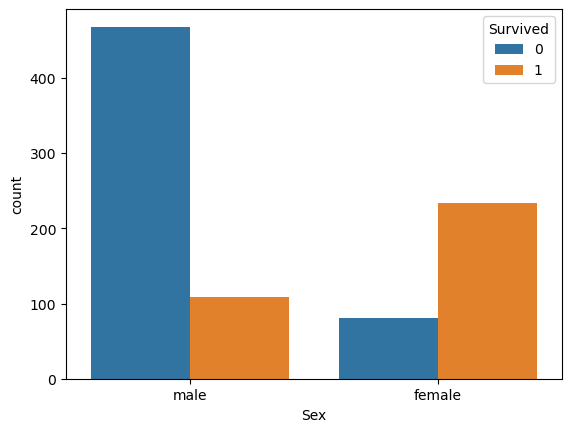

In [339]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.show()

In [340]:
# 남성 사망율이 높고, 여성 사망율은 낮음!

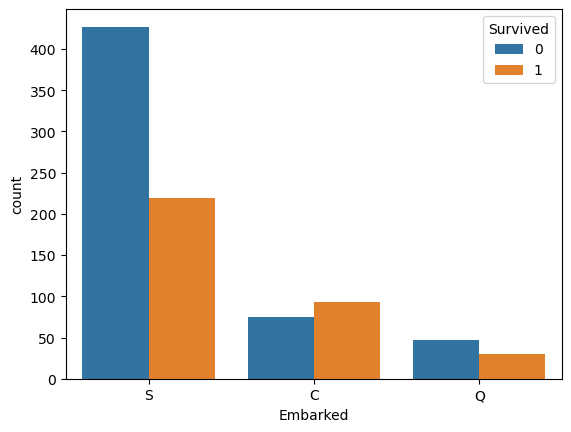

In [341]:
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.show()

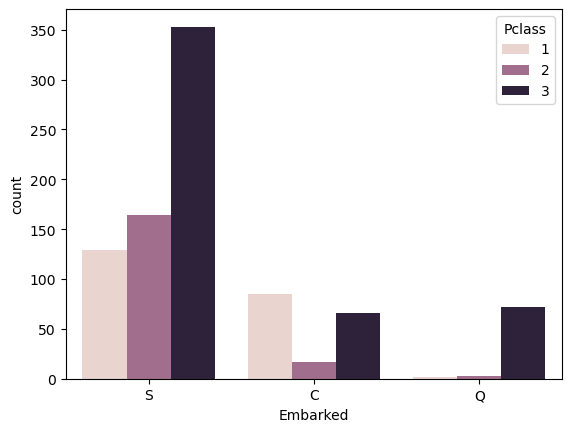

In [342]:
# S 승선항에서 Pclass가 3인 사람이 많이 탄건 아닐까?
sns.countplot(data=train, x='Embarked', hue='Pclass')
plt.show()

In [343]:
# 3등석의 비율이 다른 승선항보다 더 높지는 않다.

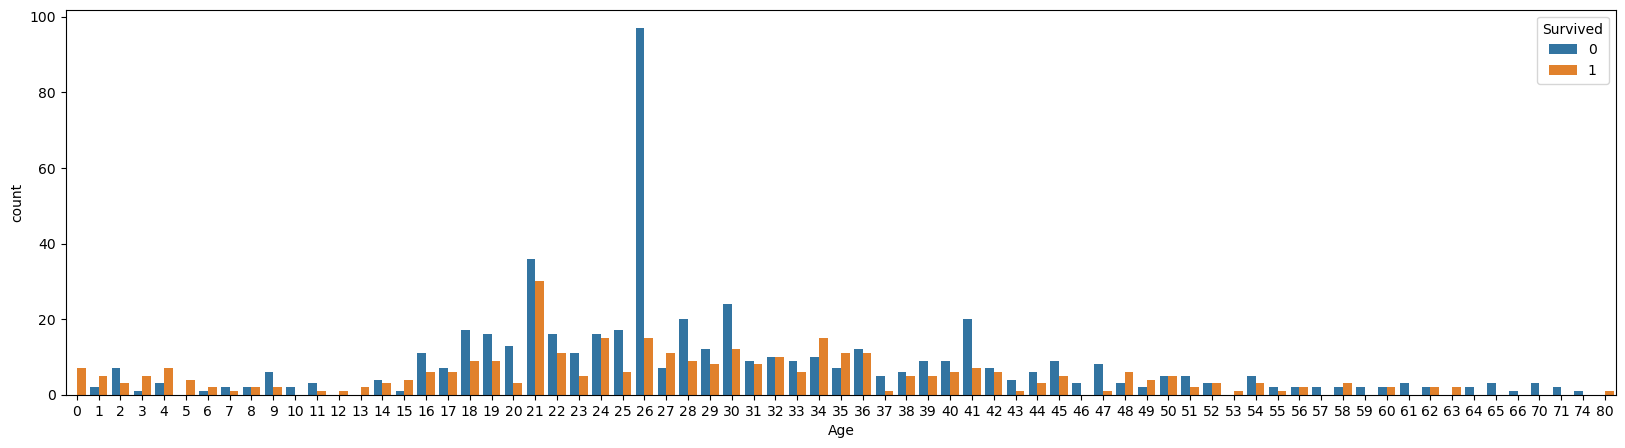

In [344]:
plt.figure(figsize=(20,5))
sns.countplot(data=train, x='Age', hue='Survived')
plt.show()

In [345]:
# 나이데이터를 countplot으로 시각화 했더니, 해석하기가 힘들다.
# violinplot : 수치형데이터의 분포를 확인할때 사용하는 그래프

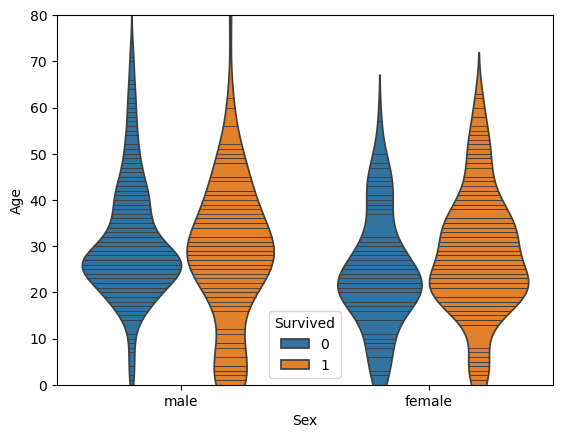

In [346]:
# 성별과 나이에 따른 생존/사망자 수를 확인

sns.violinplot(
    data = train,
    x = 'Sex',
    y = 'Age',
    hue = 'Survived',
    # split = True, # 데이터를 양쪽에 나눠서 표현
    inner = 'stick' # 바이올린 내부에 개별 데이터선
)

plt.ylim(0,80)
plt.show()
    

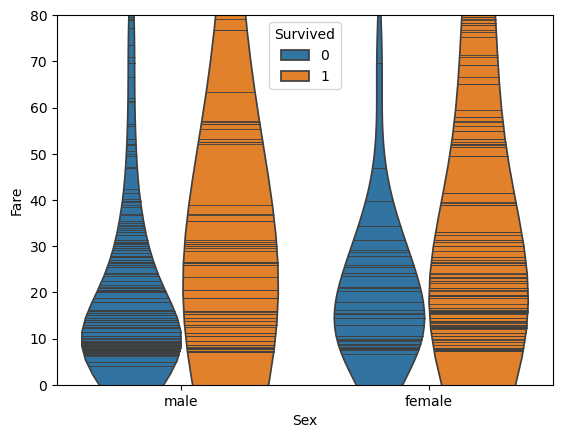

In [347]:
# 성별과 Fare에 따른 생존/사망자 수를 확인

sns.violinplot(
    data = train,
    x = 'Sex',
    y = 'Fare',
    hue = 'Survived',
    # split = True, # 데이터를 양쪽에 나눠서 표현
    inner = 'stick' # 바이올린 내부에 개별 데이터선
)

plt.ylim(0,80)
plt.show()
    

- 특성공학 : 새로운 컬럼을 생성(transform)
  - Parch, SibSp 를 더해서 가족의 숫자라는 새로운 컬럼으로 생성
  - train, test  동일하게 적용

In [348]:
# train
train['Family_Size'] = train['Parch'] + train['SibSp'] + 1
train['Family_Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_Size, Length: 891, dtype: int64

In [349]:
# train
test['Family_Size'] = test['Parch'] + test['SibSp'] + 1
test['Family_Size']

PassengerId
892     1
893     2
894     1
895     1
896     3
       ..
1305    1
1306    1
1307    1
1308    1
1309    3
Name: Family_Size, Length: 418, dtype: int64

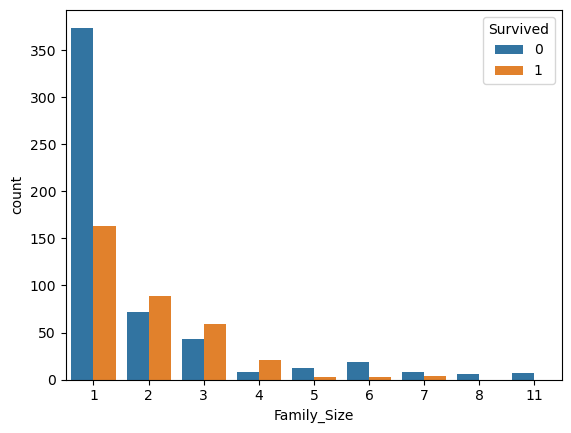

In [350]:
# 시각화
sns.countplot(data=train, x='Family_Size', hue='Survived')
plt.show()

In [351]:
# 1명일때는 사망율이 높음 - alone
# 2명~4명일때는 생존률 높음 - small
# 5명이상일때는 사망율이 높음 - Large

# 수치형 -> 범주형 (binning)


In [352]:
bins = [0, 1, 4, 11]
# (0,1] -> 0 초과 1이하
# (1,4] -> 1 초과 4이하
# (4,11] -> 4 초과 11 이하

labels = ['Alone', 'Small', 'Large']
# group이라는새로운 컬럼을 마늘기

# cut : 연속적인 수치형 데이터를 일정 범위로 나누어줌 -> 범주형
train['Family_group'] = pd.cut(train['Family_Size'], bins = [0, 1, 4, 11], labels = ['Alone', 'Small', 'Large'])

In [353]:
# test 데이터의 Family_size도 범주형으로
test['Family_group'] = pd.cut(test['Family_Size'], bins = [0, 1, 4, 11], labels = ['Alone', 'Small', 'Large'])

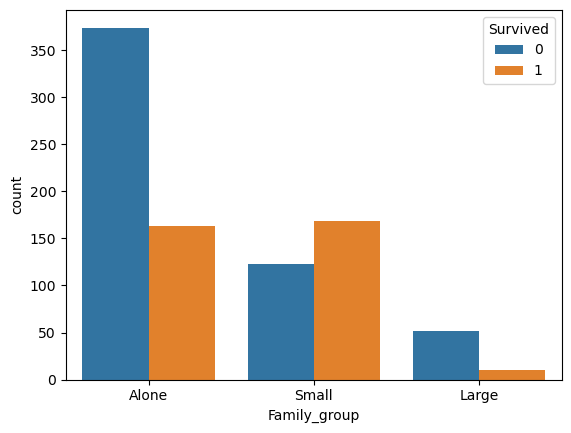

In [354]:
# 시각화
sns.countplot(data=train, x='Family_group', hue='Survived')
plt.show()

불필요한 컬럼 삭제
- drop
- 전처리 대상에서 제외된 컬럼과 특성공학 후 불필요해진 컬럼

In [355]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Embarked      891 non-null    object  
 10  Deck          891 non-null    object  
 11  Family_Size   891 non-null    int64   
 12  Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 91.5+ KB


In [356]:
# 이름, 티켓번호, 형제자매, 동행부모, 가족의 크기
# drop, axis = 1, inplace = True

train.drop(['Name','Ticket','SibSp','Parch','Family_Size'], axis = 1, inplace=True)
test.drop(['Name','Ticket','SibSp','Parch','Family_Size'], axis = 1, inplace=True)

In [357]:
train.shape, test.shape

((891, 8), (418, 7))

- 전처리 과정은 마무리
- train에는 정답데이터, 문제데이터 하나의 프레임으로 들어있는 상태
- X_train, y_train
- test는 원래 정답을 제공하지 않음.

In [358]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']
X_test = test

print(X_train.shape, y_train.shape)
print(X_test.shape)

(891, 7) (891,)
(418, 7)


- 범주형 데이터는 머신러닝 학습용으로 사용할 수 없으니, 수치형으로 바꿔야한다 (인코딩 진행 필요)

In [359]:
X_train_one_hot = pd.get_dummies(X_train)
X_test_one_hot = pd.get_dummies(X_test)

In [360]:
X_train_one_hot.shape , X_test_one_hot.shape

((891, 20), (418, 19))

In [361]:
X_train_one_hot.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large'],
      dtype='object')

In [362]:
X_test_one_hot.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large'],
      dtype='object')

- 특성 개수 맞추기
1. 컬럼명을 확인해서 다른점 찾기
2. set() 집합 자료구조 활용해서 찾기

In [363]:
# set
set(X_train_one_hot) - set(X_test_one_hot)

{'Deck_T'}

In [364]:
# X_test에 Deck_T라는 컬럼을 새롭게 만들어주자
# X_test에는 T값을 가진 행이 없으므로 Deck_T 에는 0으로 넣어주자

X_test_one_hot['Deck_T'] = 0
X_test_one_hot['Deck_T']

PassengerId
892     0
893     0
894     0
895     0
896     0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: Deck_T, Length: 418, dtype: int64

In [365]:
X_train_one_hot.info()
X_test_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    int64  
 2   Fare                891 non-null    float64
 3   Sex_female          891 non-null    bool   
 4   Sex_male            891 non-null    bool   
 5   Embarked_C          891 non-null    bool   
 6   Embarked_Q          891 non-null    bool   
 7   Embarked_S          891 non-null    bool   
 8   Deck_A              891 non-null    bool   
 9   Deck_B              891 non-null    bool   
 10  Deck_C              891 non-null    bool   
 11  Deck_D              891 non-null    bool   
 12  Deck_E              891 non-null    bool   
 13  Deck_F              891 non-null    bool   
 14  Deck_G              891 non-null    bool   
 15  Deck_M              891 non-null    bool   
 16  Deck_T       

In [366]:
# X_train_one_hot의 컬럼의 순서, X_test_one_hot의 컬럼의 순서가 다름
# X_train 컬럼 순서대로 인덱싱
X_test_one_hot = X_test_one_hot[X_train_one_hot.columns]


In [367]:
X_test_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   Fare                418 non-null    float64
 3   Sex_female          418 non-null    bool   
 4   Sex_male            418 non-null    bool   
 5   Embarked_C          418 non-null    bool   
 6   Embarked_Q          418 non-null    bool   
 7   Embarked_S          418 non-null    bool   
 8   Deck_A              418 non-null    bool   
 9   Deck_B              418 non-null    bool   
 10  Deck_C              418 non-null    bool   
 11  Deck_D              418 non-null    bool   
 12  Deck_E              418 non-null    bool   
 13  Deck_F              418 non-null    bool   
 14  Deck_G              418 non-null    bool   
 15  Deck_M              418 non-null    bool   
 16  Deck_T    

### 모델 선택 및 학습

In [368]:
from sklearn.tree import DecisionTreeClassifier

# 교차검증
from sklearn.model_selection import cross_val_score # 교차검증

In [369]:
# 모델 객체 생성
# 하이퍼 팔라미터 설정X

tree_model = DecisionTreeClassifier()

In [370]:
cv_result = cross_val_score(tree_model, X_train_one_hot, y_train, cv=5)
cv_result

array([0.74301676, 0.7752809 , 0.83707865, 0.7752809 , 0.80337079])

In [371]:
cv_result.mean()
# 평균적으로 78%의 성능을 내고 있다.
# test에서는 좀 더 떨어질 수도 있겠다.

np.float64(0.7868055991463185)

- tree model의 하이퍼파라미터를 조정(최대 깊이)

In [372]:
# 모델 학습
tree_model2 = DecisionTreeClassifier(max_depth = 3)

result = cross_val_score(tree_model2, X_train_one_hot, y_train, cv=5)
result

array([0.81005587, 0.80898876, 0.80337079, 0.78089888, 0.80337079])

In [373]:
# 모델 학습
from sklearn.model_selection import KFold
tree_model2 = DecisionTreeClassifier(max_depth = 4)

result = cross_val_score(tree_model2, X_train_one_hot, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42))
result.mean()

np.float64(0.8148327160881301)

In [374]:
result.mean()

np.float64(0.8148327160881301)

In [375]:
# 교차검증을 하면서, 하이퍼파라미터 조정 (1~9)
for md in range(1,10):
    tree_model = DecisionTreeClassifier(max_depth=md)
    result = cross_val_score(tree_model, X_train_one_hot, y_train, cv=5)
    print(f'depth:{md}', result.mean())

depth:1 0.7867365513778168
depth:2 0.773316176009039
depth:3 0.8024606113866047
depth:4 0.8092524009792228
depth:5 0.8136965664427844
depth:6 0.813709120582512
depth:7 0.8080785889146946
depth:8 0.821542903772519
depth:9 0.8114556525014123


In [376]:
# depth가 8일때 82퍼정도로 가장 높음

In [412]:
tree_model2 = DecisionTreeClassifier(max_depth=8)

# 학습
tree_model2.fit(X_train_one_hot, y_train)

# 예측
pre2 = tree_model2.predict(X_test_one_hot)

# 캐글 답안지 불러오고
result2 = pd.read_csv('data/gender_submission.csv')
result2['Survived'] = pre2
result2.to_csv('data/RF_model_1.csv', index=False)

In [378]:
# tree_model2가 어떤 특성을 중요하게 생각하는지
fi = tree_model2.feature_importances_

In [379]:
fi_s = pd.DataFrame(fi, index = X_train_one_hot.columns, columns = ['imp'])
fi_s

,imp
Pclass,0.116123
Age,0.171288
Fare,0.110215
Sex_female,0.436487
Sex_male,0.000000
Embarked_C,0.002620
Embarked_Q,0.000000
Embarked_S,0.010741
Deck_A,0.000000
Deck_B,0.000000


In [380]:
fi_s.sort_values('imp', ascending=False)

,imp
Sex_female,0.436487
Age,0.171288
Pclass,0.116123
Fare,0.110215
Family_group_Small,0.049898
Deck_M,0.049457
Family_group_Large,0.035260
Deck_E,0.013117
Embarked_S,0.010741
Deck_D,0.004794


<Figure size 500x500 with 0 Axes>

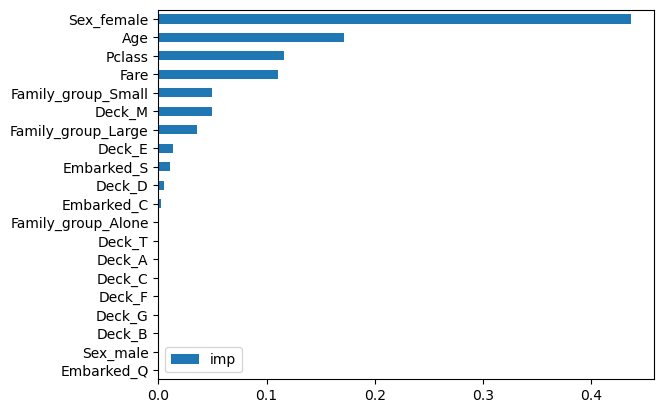

In [381]:
plt.figure(figsize=(5,5))
fi_s.sort_values('imp', ascending=True).plot.barh()
plt.show()

### 앙상블
- 여러 모델이 결합하는 방식으로 활용하며, 성능을 높이는 기법
  1. 보팅(Voting)
     - 여러개의 다른 종류의 모델이 예측한 결과를 투표 혹은 평균을통해 최종 결정을 하는 방식
       하드보팅, 소프트보팅
  2. 배깅(Bagging)
     - 여러개의 같은 종류의 모델이 예측한 결과를 투표 혹은 푱균을 통해 최종 결정을 하는 방식
     - RandomForest(Decision Tree를 여러개 사용하는 모델)
  3. 부스팅(Boosting)
     - 여러 모델을 순차적으로 학습을 시켜 이전 모델의 오류를 보정
     - AdaBoost, GradientBoost,
     - 후속 모델이 이전 모델의 잘못된 예측을 수정하면서 점점 성능을 높여가는 방식


In [382]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [383]:
# 랜덤포레스트 모델 정의
forest_model = RandomForestClassifier(n_estimators=100, # 트리의 개수
                                      max_features=5, # 선택할 최대 특성 수
                                      max_depth=4,
                                      random_state=11
                                     )

In [384]:
# 랜덤포레스트 모델 교차검증
result_RF = cross_val_score(forest_model, X_train_one_hot, y_train, cv=5)
result_RF

array([0.82122905, 0.82022472, 0.82022472, 0.79775281, 0.82022472])

In [385]:
result_RF.mean()

np.float64(0.8159312033142928)

### 에이다 부스팅

In [386]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=14)

In [387]:
result_ada = cross_val_score(ada_model,
                            X_train_one_hot,
                             y_train,
                             cv=5
                            )
result_ada

array([0.77653631, 0.80898876, 0.81460674, 0.81460674, 0.83146067])

In [388]:
result_ada.mean()

np.float64(0.8092398468394952)

### 보팅

In [389]:
# VotingClassfier의 estimators 내에는 튜플로 해당 모델의 명칭을 같이 넣어줘야함

voting_model = VotingClassifier(estimators=[
    ('tree', tree_model2),
    ('forest', forest_model),
    ('ada', ada_model)],
    voting ='soft'
                               )

In [390]:
# 교차검증
result_voting = cross_val_score(voting_model,
                               X_train_one_hot,
                               y_train,
                                cv=5
                               )
result_voting

array([0.81005587, 0.80337079, 0.85955056, 0.80337079, 0.84269663])

In [391]:
result_voting.mean()

np.float64(0.8238089259933462)

xgboost, lightgbm

In [392]:
# xgboost 설치
!pip install xgboost

In [393]:
# lightgbm 설치
!pip install lightgbm

In [394]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [397]:
xg_model = XGBClassifier(n_estimators = 100, random_state=42)

In [398]:
# xgboost의 경우 정답데이터도 숫자형이여야 한다.
y_train.info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [399]:
# 교차검증
result_xg = cross_val_score(xg_model,
                               X_train_one_hot,
                               y_train,
                                cv=5
                               )
result_xg

array([0.79329609, 0.79775281, 0.84831461, 0.78089888, 0.83707865])

In [400]:
result_xg.mean()

np.float64(0.8114682066411399)

### LightGBM

In [401]:
lgb_model = LGBMClassifier(n_estimators=100, random_state=17)

In [402]:
# 교차검증
result_lgb = cross_val_score(lgb_model,
                               X_train_one_hot,
                               y_train,
                                cv=5
                               )
result_lgb

C:\Users\smhrd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\smhrd\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\smhrd\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

array([0.79888268, 0.81460674, 0.84831461, 0.80898876, 0.85955056])

In [403]:
result_lgb.mean()

np.float64(0.8260686711443098)

### GridSearchCV 적용해서 최적의 하이퍼파라미터 찾기

In [405]:
# 도구 불러오기
from sklearn.model_selection import GridSearchCV

In [406]:
# 1. 하이퍼파라미터(초 매개변수) 경우의 수 설정
params = {
    'n_estimators' : [50, 100, 200], # 트리의 개수
    'max_depth' : [3, 5, 7], # 트리의 최대 깊이를 제한
    'min_samples_split' : [3, 5, 7] # 노드를 분할하기 위한 최소 샘플 수
}

# 2. 모델 초기화(생성)
rf_clf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    rf_clf,
    params,
    cv = 5,
    n_jobs= -1 # 사용 가능한 모든 cpu코어를 사용하여 병렬처리로 수행
)

# 3. 실행
grid.fit(X_train_one_hot, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_split': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [407]:
# 최적의 하이퍼파라미터 조합 확인
grid.best_params_

{'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 200}

In [409]:
# 최적의 하이퍼파라미터로 예측을 수행한 성능값
grid.best_score_

np.float64(0.8226727763480008)

In [410]:
# 최적의 하이퍼파라미터로 세팅된 모델
best_rf_clf = grid.best_estimator_
best_rf_clf

RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=200,
                       random_state=42)

In [411]:
cross_val_score(best_rf_clf, X_train_one_hot, y_train, cv=5).mean()

np.float64(0.8226727763480008)